In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
directory = '/Users/tarekchaouch/Desktop/germany/Day-Ahead Auction/Hourly/Current/Block bids'
data_frames= []
files = os.listdir(directory)
for file in files:
    path = os.path.join(directory, file)
    with open(path, 'r') as f:
        # Skip first 3 rows
        for _ in range(3):
            next(f)
        # Read the titles from line 3
        titles = next(f).strip().split(';')
    # Read the CSV file into a DataFrame
    df = pd.read_csv(path, skiprows=7, sep=';', header=None)
    # Assign extracted titles as column names
    df.columns = titles
    data_frames.append(df)
    

In [ ]:
data_frames[0].head(20)


In [ ]:
data_frames[1].head(20)


In [ ]:
data_frames[10].head(20)

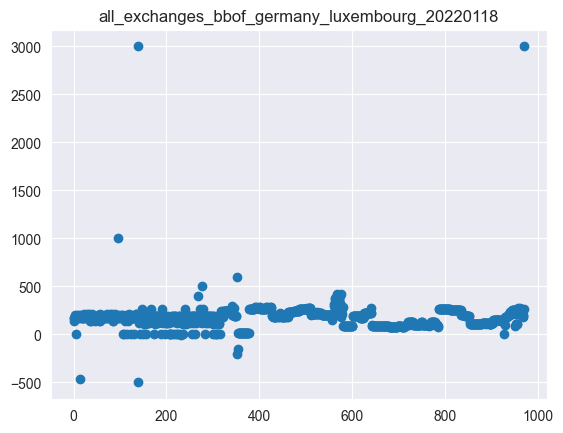

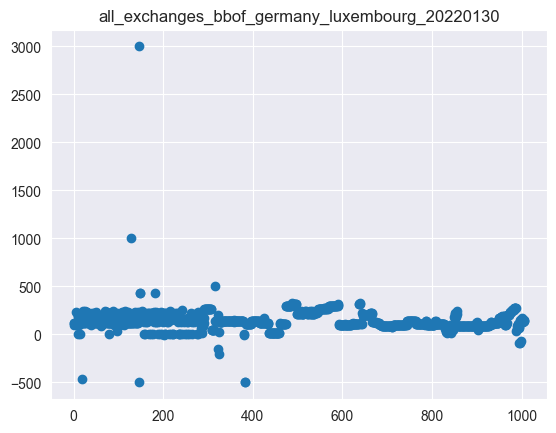

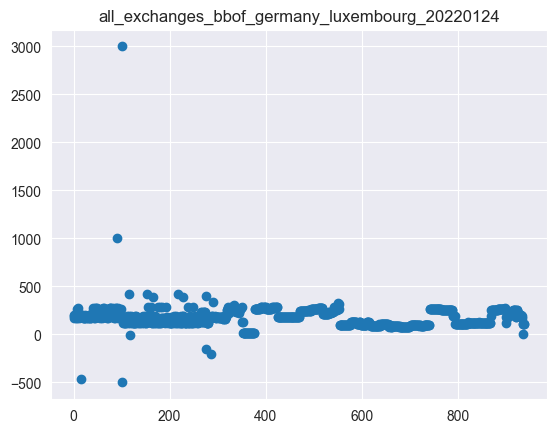

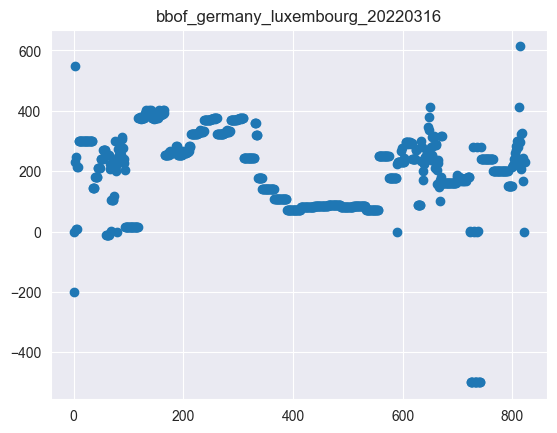

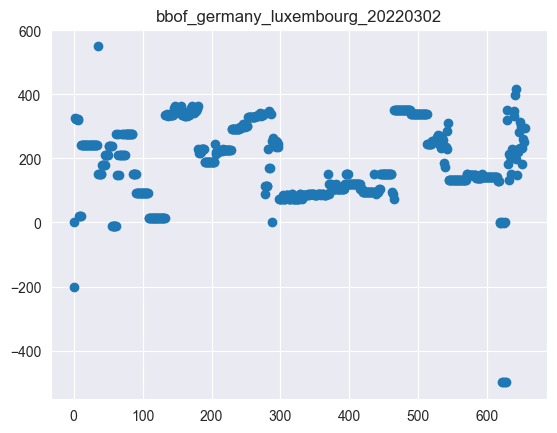

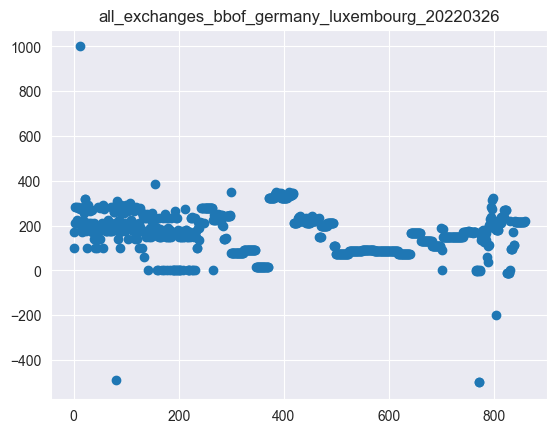

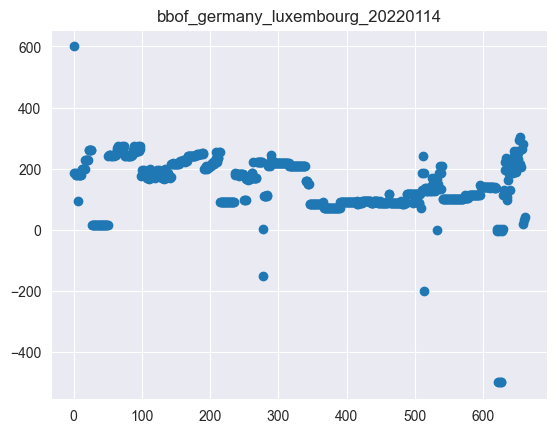

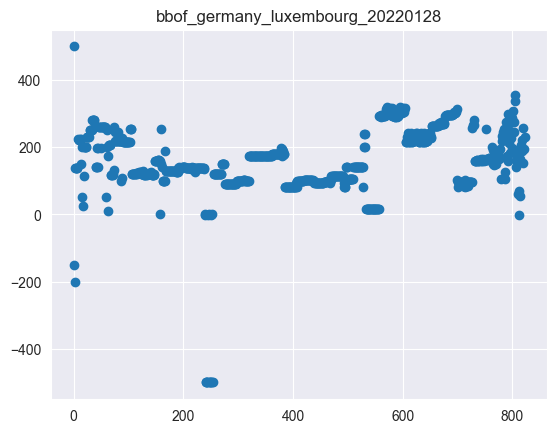

KeyboardInterrupt: 

In [4]:
#plot the limit price of each index for each date
for df, file in zip(data_frames, files):
    fig, ax = plt.subplots()
    ax.scatter(df.index,df["Limit Price"])
    plt.title(file[:-4])
    plt.show()

In [ ]:
#add a new column sumVolumes and determine the distribution and the limit price with respect to the volumes 
for df, file in zip(data_frames, files):
    # Identify columns that start with "Volume"
    volume_columns = [col for col in df.columns if col.startswith('Volume')]
    
    # Sum the values in these columns row-wise
    df['VolumeSum'] = df[volume_columns].sum(axis=1)
    
    # Plot VolumeSum against LimitPrice
    plt.figure(figsize=(10, 6))
    plt.bar(df['VolumeSum'], df['Limit Price'],color='white', edgecolor='black')

    # Add title and labels
    plt.title(file[:-4])
    plt.ylabel('Limit Price')
    plt.xlabel('VolumeSum of each block bid')
    
    # Show the plot
    plt.grid(True)
    plt.show()

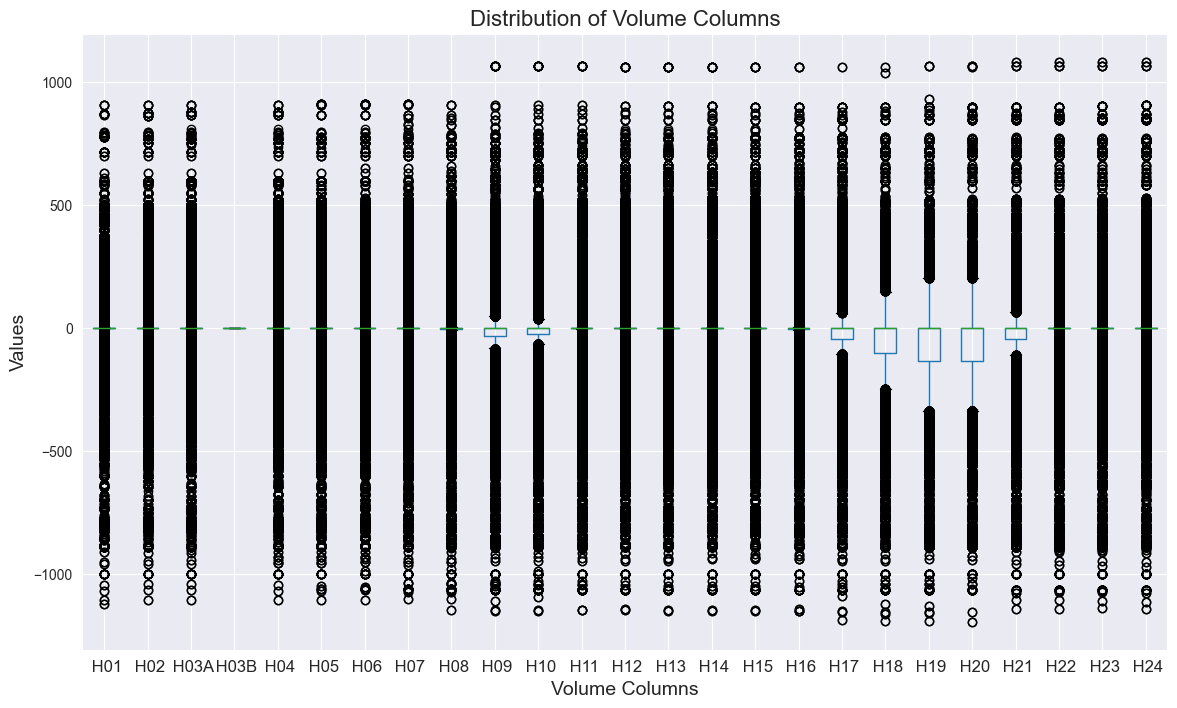

In [5]:
#shows the distribution of electricity volumes across 24 hours

# Collect all 'Volume' columns from each DataFrame, excluding 'VolumeSum'
volume_data = []

for df in data_frames:
    # Identify columns that start with "Volume" and exclude 'VolumeSum'
    volume_columns = [col for col in df.columns if col.startswith('Volume') and col != 'VolumeSum']
    volume_data.append(df[volume_columns])

# Concatenate all the 'Volume' columns into a single DataFrame
concatenated_df = pd.concat(volume_data)

# Extract characters after "Volume" for x-axis labels
x_labels = [col[len("Volume"):] for col in concatenated_df.columns]

# Create a box plot for the concatenated 'Volume' columns
plt.figure(figsize=(14, 8))  # Adjust the figure size

concatenated_df.boxplot()

# Set custom x-axis labels with increased font size
plt.xticks(ticks=range(1, len(concatenated_df.columns) + 1), labels=x_labels, fontsize=12)

# Add titles and labels
plt.title('Distribution of Volume Columns', fontsize=16)
plt.xlabel('Volume Columns', fontsize=14)
plt.ylabel('Values', fontsize=14)

# Show the plot
plt.grid(True)
plt.show()

#The y-axis values show the sum of volumes of electricity for each hour with the range from approximately -1000 to 1000


#Observation: 

# Hours H10, H18, H19, and H20 have relatively smaller IQRs, suggesting more consistent volume values during these hours.

#The plot shows both negative and positive values, indicating that the sum of volumes can vary widely, possibly due to the differences between supply and demand 

#If the median line is closer to the bottom of the box, it indicates a positive skew, whereas if it is closer to the top, it indicates a negative skew.

#The presence of numerous outliers suggests that extreme values are common in the dataset.

#When Median is near zero --> balanced volumes.

#Wide IQR --> high variability.

# At H17, 18,19 narrower IQR compared to most hours --> indicates less variability and fewer outliers (less extreme values)

#Summary
# Narrower IQRs (during hours H10, H18, H19, H20) indicates more stable and consistent electricity volumes.
# Wider IQRs (during most other hours) indicate higher variability and less stability in electricity volumes.

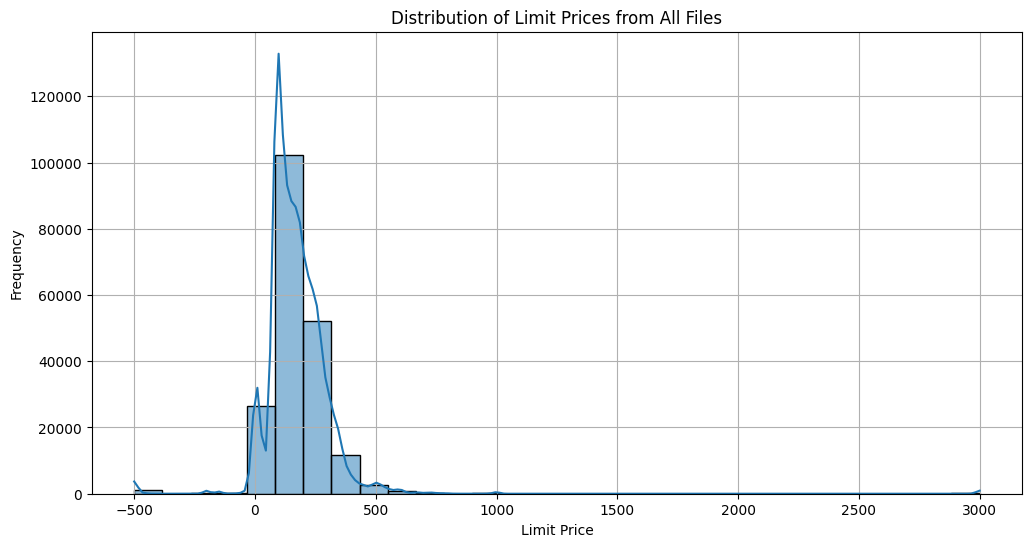

In [6]:

# Curve : Distribution of the limit Price for all the BB files
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_limit_price_distribution(folder_path):
    # List all CSV files in the folder
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    # Initialize an empty list to store limit prices
    limit_prices = []

    # Define a function to extract limit prices from a single file
    def extract_limit_prices(file_path):
        with open(file_path, 'r') as file:
            lines = file.readlines()

        # Extract the lines that start with 'BB'
        data_lines = [line for line in lines if line.startswith('BB')]

        # Convert the data lines into a DataFrame
        columns = [
            'DataType', 'BlockID', 'BlockType', 'BlockCodePRM', 'Execution',
            'LimitPrice', 'Volume H01', 'Volume H02', 'Volume H03A', 'Volume H03B',
            'Volume H04', 'Volume H05', 'Volume H06', 'Volume H07', 'Volume H08',
            'Volume H09', 'Volume H10', 'Volume H11', 'Volume H12', 'Volume H13',
            'Volume H14', 'Volume H15', 'Volume H16', 'Volume H17', 'Volume H18',
            'Volume H19', 'Volume H20', 'Volume H21', 'Volume H22', 'Volume H23',
            'Volume H24', 'MAR', 'AAR'
        ]
        df = pd.DataFrame([line.strip().split(';') for line in data_lines], columns=columns)

        # Convert 'LimitPrice' to numeric and drop NaN values
        df['LimitPrice'] = pd.to_numeric(df['LimitPrice'], errors='coerce')
        return df['LimitPrice'].dropna()

    # Loop through all CSV files and extract limit prices
    for file in csv_files:
        file_path = os.path.join(folder_path, file)
        limit_prices.extend(extract_limit_prices(file_path))

    # Plot the distribution of limit prices
    plt.figure(figsize=(12, 6))
    sns.histplot(limit_prices, kde=True, bins=30)
    plt.title('Distribution of Limit Prices from All Files')
    plt.xlabel('Limit Price')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

folder_path = '/Users/tarekchaouch/Desktop/germany/Day-Ahead Auction/Hourly/Current/Block bids'  
plot_limit_price_distribution(folder_path)


# Observation
# Theis highest peak of the distribution lies between 0 and 500
# The right-skewed nature of the distribution suggests the presence of some high-value transactions, though they are less common.
